In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
egdi = pd.read_csv('EGOV_DATA_2024.csv')

In [92]:
paises = egdi['Country Name'].unique().tolist()

In [93]:
pib = pd.read_csv('pib_percapita_ppc.csv')

In [94]:
set(paises).difference(set(pib['Country Name']))

{'Bahamas',
 'Congo',
 'Czech Republic',
 "Côte d'Ivoire",
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Egypt',
 'Gambia',
 'Georgia (Country)',
 'Iran (Islamic Republic of)',
 'Kyrgyzstan',
 "Lao People's Democratic Republic",
 'Micronesia (Federated States of)',
 'Republic of Korea',
 'Republic of Moldova',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'Slovakia',
 'Türkiye',
 'United Kingdom of Great Britain and Northern Ireland',
 'United Republic of Tanzania',
 'United States of America',
 'Venezuela',
 'Yemen'}

In [95]:
pib['Country Name'] = pib['Country Name'].replace({
    'Bahamas, The': 'Bahamas',
    'Congo, Rep.': 'Congo',
    'Czechia': 'Czech Republic',
    "Cote d'Ivoire": "Côte d'Ivoire",
    "Korea, Dem. People's Rep.": "Democratic People's Republic of Korea",
    'Congo, Dem. Rep.': 'Democratic Republic of the Congo',
    'Egypt, Arab Rep.': 'Egypt',
    'Georgia': 'Georgia (Country)',
    'Gambia, The': 'Gambia',
    'Yemen, Rep.': 'Yemen',
    'Venezuela, RB': 'Venezuela',
    'Slovak Republic': 'Slovakia',
    'United Kingdom': 'United Kingdom of Great Britain and Northern Ireland',
    'Tanzania': 'United Republic of Tanzania',
    'United States': 'United States of America',
    'Turkiye': 'Türkiye',
    'St. Kitts and Nevis': 'Saint Kitts and Nevis',
    'St. Lucia': 'Saint Lucia',
    'St. Vincent and the Grenadines': 'Saint Vincent and the Grenadines',
    "Iran, Islamic Rep.": 'Iran (Islamic Republic of)',
    'Korea, Rep.': 'Republic of Korea',
    'Moldova': 'Republic of Moldova',
    "Kyrgyz Republic": 'Kyrgyzstan',
    'Lao PDR': "Lao People's Democratic Republic",
    "Micronesia, Fed. Sts.": 'Micronesia (Federated States of)'
})

In [96]:
set(paises).difference(set(pib['Country Name']))

set()

In [97]:
pib = pib[pib['Country Name'].isin(paises)].sort_values(by=['Country Name'], ascending=True).reset_index(drop=True)

In [98]:
tic = pd.read_excel('ict_in_government.xlsx')

In [99]:
set(paises).difference(set(tic['Country']))

{'Georgia (Country)', 'San Marino', 'Türkiye'}

In [100]:
tic['Country'] = tic['Country'].replace({
    'Turkey': 'Türkiye',
    'Georgia': 'Georgia (Country)',
    'San Mari0': 'San Marino'
})

In [101]:
set(paises).difference(set(tic['Country']))

set()

In [102]:
tic['Soma das Respostas Positivas'] = tic['Indicator_1'] + tic['Indicator_2'] + tic['Indicator_3']

In [103]:
tic = tic[tic['Year'] == 2024]

In [104]:
tic = tic[tic['Country'].isin(paises)].sort_values(by='Country', ascending=True).reset_index(drop=True)

In [105]:
df = pd.DataFrame()

In [106]:
df['Soma das Respostas Positivas'] = tic['Soma das Respostas Positivas']

In [107]:
df['Produto Interno Bruto'] = pib['2024']

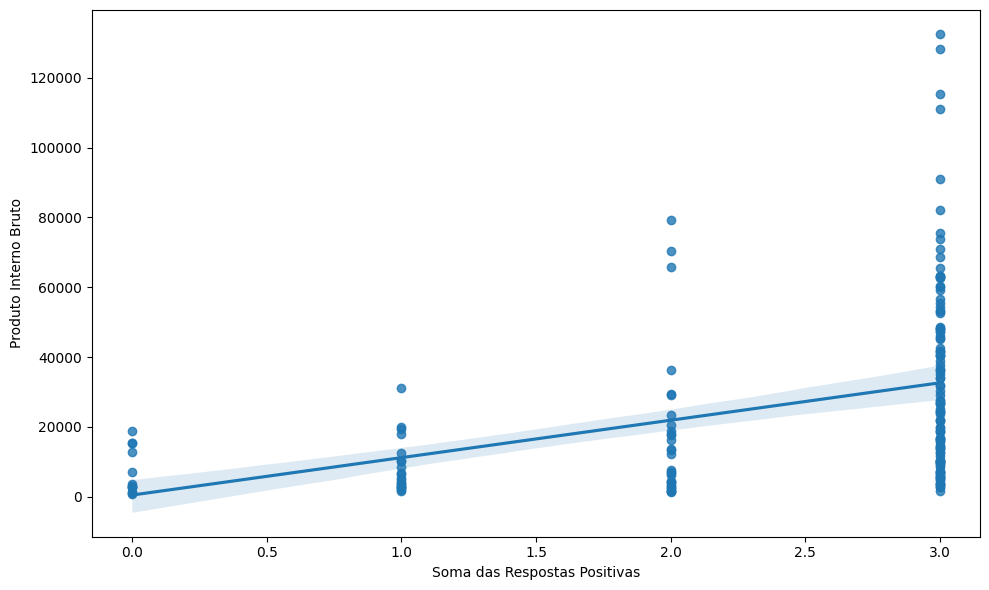

In [108]:
plt.figure(figsize=(10, 6))

sns.regplot(df, x='Soma das Respostas Positivas', y='Produto Interno Bruto')

plt.tight_layout()
plt.savefig('C:/Users/lazar/Master-Dissertation/figuras/ict_in_government/dispersao_ticegov_pib.png', dpi=300, bbox_inches='tight')
plt.show()

In [109]:
df.corr(method='spearman')

,Soma das Respostas Positivas,Produto Interno Bruto
Soma das Respostas Positivas,1.000000,0.514287
Produto Interno Bruto,0.514287,1.000000
